In [25]:
import gzip
import math
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def readGz(path):
    for l in gzip.open(path, 'rt', encoding='cp437', errors='ignore'):
        yield eval(l)

In [4]:
dataset = []
for l in readGz("australian_users_items.json.gz"):
    dataset.append(l)

In [5]:
pairs = []
for d in dataset:
    for i in d['items']:
        pairs.append((d['user_id'], i['item_id'], i['playtime_forever']))

In [6]:
itemsPerUser = defaultdict(set)
usersPerItem = defaultdict(set)

for p in pairs:
    u = p[0]
    i = p[1]
    t = p[2]
    if t > 0:
        itemsPerUser[u].add(i)
        usersPerItem[i].add(u)

In [7]:
len(itemsPerUser)
# number of unique users in the dataset

68403

In [8]:
len(usersPerItem)
# number of unique games in the dataset

10050

In [9]:
len(dataset)

88310

In [10]:
count = 0
for d in dataset:
    if len(d["items"]) == 0 :
        count += 1
count

16806

In [11]:
userId = [d["steam_id"] for d in dataset]

In [12]:
userId = np.array(userId)

In [13]:
unique, counts = np.unique(userId, return_counts=True)

In [22]:
dataset[0]

{'user_id': '76561197970982479',
 'items_count': 277,
 'steam_id': '76561197970982479',
 'user_url': 'http://steamcommunity.com/profiles/76561197970982479',
 'items': [{'item_id': '10',
   'item_name': 'Counter-Strike',
   'playtime_forever': 6,
   'playtime_2weeks': 0},
  {'item_id': '20',
   'item_name': 'Team Fortress Classic',
   'playtime_forever': 0,
   'playtime_2weeks': 0},
  {'item_id': '30',
   'item_name': 'Day of Defeat',
   'playtime_forever': 7,
   'playtime_2weeks': 0},
  {'item_id': '40',
   'item_name': 'Deathmatch Classic',
   'playtime_forever': 0,
   'playtime_2weeks': 0},
  {'item_id': '50',
   'item_name': 'Half-Life: Opposing Force',
   'playtime_forever': 0,
   'playtime_2weeks': 0},
  {'item_id': '60',
   'item_name': 'Ricochet',
   'playtime_forever': 0,
   'playtime_2weeks': 0},
  {'item_id': '70',
   'item_name': 'Half-Life',
   'playtime_forever': 0,
   'playtime_2weeks': 0},
  {'item_id': '130',
   'item_name': 'Half-Life: Blue Shift',
   'playtime_forever

In [23]:
gameCounts = defaultdict(int)
for d in dataset:
    for g in d["items"]:
        gameCounts[g["item_name"]] += 1

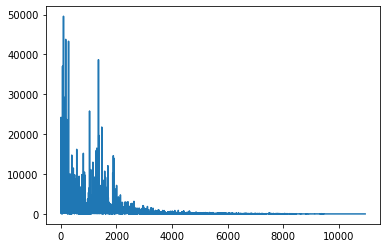

In [28]:
plt.plot(np.array(list(gameCounts.values())))
plt.show()

In [29]:
np.mean(np.array(list(gameCounts.values())))

470.74166438293594